<a href="https://colab.research.google.com/github/omer358/ml-acamey/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/ml/titanic

/content/drive/MyDrive/ml/titanic


In [1]:
ls

sample_data/


In [6]:
# imports
import pandas as pd
import numpy as np
import os

In [7]:
# read the data with all the defaults for pandas
train_df = pd.read_csv("train.csv", index_col='PassengerId')
test_df = pd.read_csv("test.csv", index_col='PassengerId')

In [8]:
# What is the type of object?
type(train_df)

pandas.core.frame.DataFrame

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [12]:
# great, our data structures are in the data frames
#
# Survived = TRUE/FALSE 0/1
# PClass is passenger class, 1,2,3
# SibSp - siblings or spouse onboard
# Parch - number of parents or children
# Ticket - ticket number
# Fare - fare
# Cabin - which cabin were they in
# Embarked - point of embarkation (C Cherbourg, Q Queenstown - now Cobh, S Southampton)
#
# We should also note that we have non-null entries
# in Training, we don't have ages for some of the passengers
# and we only have some Cabin informaiton
# and we're missing info on where some of the passengers embarked
# Memory Usage is helpful if we're working on a whole bunch of data
#
# In Test we have 418 entries, with missing values too.  We'll fix this up
# We do not have the Survived column in TEST dataset - that's the prediction we are trying to achieve
#
# Let's add a Survived column to Test, then combine both the datasets

In [13]:
test_df['Survived'] = -888 # Add Survived with the default value of -888

In [14]:
df = pd.concat((train_df, test_df), axis=0) #there are some axis parameters - how do we want to concat them?
# if axis = 0, then concat row wise - i.e. stack on each other.
# if axis = 1, then concat along the columns sideways 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [16]:
# Now we have all the rows
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.head(100)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C


last 5 rows

In [18]:
df.tail(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1300,-888,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1301,-888,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1302,-888,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1303,-888,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
1304,-888,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1305,-888,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,-888,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,-888,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,-888,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [19]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [ ]:
# Selection of a particular column
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [20]:
# or column name as a string is possible
df['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [21]:
# select multiple columns using a list of column name strings
df[['Name','Age']]

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
...,...,...
1305,"Spector, Mr. Woolf",NaN
1306,"Oliva y Ocana, Dona. Fermina",39.0
1307,"Saether, Mr. Simon Sivertsen",38.5


In [24]:
# indexing for loc for label based indexing - i.e. we are using the PassengerId
# Get all columns - we want to get only columns with rows id from 1-10
# 
df.loc[1307:1309,]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1307,-888,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,-888,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,-888,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [25]:
# indexing and only return certain columns - all columns from Age->PClass, for pax 5->10
df.loc[5:10, ['Age','Pclass']]

,Age,Pclass
PassengerId,,
5,35.0,3
6,NaN,3
7,54.0,1
8,2.0,3
9,27.0,3
10,14.0,2


In [26]:
# select discrete columns
t= df.loc[5:10, ['Sex']]
t

,Sex
PassengerId,
5,male
6,male
7,male
8,male
9,female
10,female


0 based

In [27]:
# position based indexing is also possible - not recommended, incase we add extra columns...
df.iloc[5:10, 3:8]

,Sex,Age,SibSp,Parch,Ticket
PassengerId,,,,,
6,male,NaN,0,0,330877
7,male,54.0,0,0,17463
8,male,2.0,3,1,349909
9,female,27.0,0,2,347742
10,female,14.0,1,0,237736


In [28]:
# filtering rows on conditions
male_passengers = t.loc[df.Sex == 'male',:]
male_passengers

,Sex
PassengerId,
5,male
6,male
7,male
8,male


In [29]:
# use & and | operators to build complex logic
male_passengers_first_class = df.loc[((df.Sex =='male') & (df.Pclass == 1))]
print('number of male 1st class pax: {0}'.format(len(male_passengers_first_class)))

number of male 1st class pax: 179


**Summary Statistics**

In [30]:
# describe to get stats for all the numberic columsn - survived is skewed by our -888 default value earlier added
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,-283.301757,2.294882,29.881138,0.498854,0.385027,33.295479
std,414.337413,0.837836,14.413493,1.041658,0.865560,51.758668
min,-888.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,-888.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
# Let's get some stats manually
# Using numerical features to start with
print('Mean fare: {0}'.format(df.Fare.mean()))
print('Median fare: {0}'.format(df.Fare.median()))

Mean fare: 33.2954792813456
Median fare: 14.4542


In [ ]:
# let's look at a bunch of other data
print('Min fare : {0}'.format(df.Fare.min())) # minimum
print('Max fare : {0}'.format(df.Fare.max())) # maximum
print('Fare range : {0}'.format(df.Fare.max()  - df.Fare.min())) # range
print('25 percentile : {0}'.format(df.Fare.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(df.Fare.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(df.Fare.quantile(.75))) # 75 percentile
print('Variance fare : {0}'.format(df.Fare.var())) # variance
print('Standard deviation fare : {0}'.format(df.Fare.std())) # standard deviation

Min fare : 0.0
Max fare : 512.3292
Fare range : 512.3292
25 percentile : 7.8958
50 percentile : 14.4542
75 percentile : 31.275
Variance fare : 2678.959737892894
Standard deviation fare : 51.75866823917414


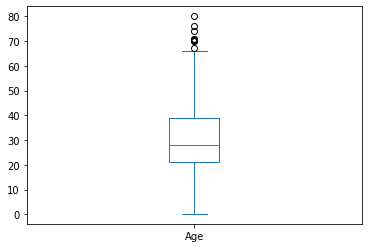

In [32]:
%matplotlib inline


# box whisker!!
df.Fare.plot(kind='box')

**categorical features**

In [33]:
df.describe(include='all')# describe categorical features too

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,-283.301757,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,414.337413,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,-888.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,-888.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [34]:
# we can see tehre are only 3 embarked points, with most popular S southhampton
# we don't have category-wise counts of proportions so we use value counts
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [35]:
# get the proposition using the normalise 
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [38]:
# apply the value count on other columns
# who survived or not? but ignore our default Test rows.  
# So this is extracing only the Training data from the df, and seeing how many survived.
df[df.Survived != -888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# how many passengers were in each class?
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

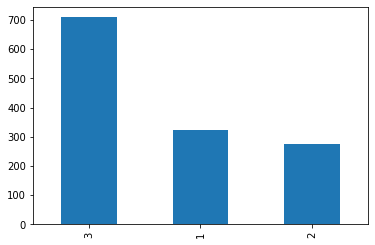

In [41]:
# most were in third class
# visualise these...
df.Pclass.value_counts().plot(kind='bar')

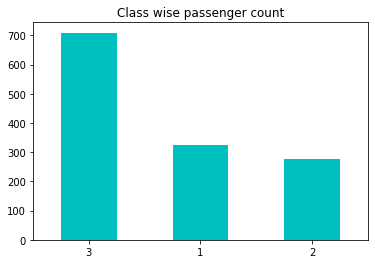

In [42]:
df.Pclass.value_counts().plot(kind='bar', rot=0, title='Class wise passenger count', color='c');
# rot makes the x axis titles straight, ; supresses the matplotlib header, c is cyan, title is obvious